# Plotting tracks

In [1]:
import huracanpy

In [3]:
# Load the tracks
tracks = huracanpy.load(huracanpy.example_year_file)

/Users/bourdin/Softs/huracanpy/huracanpy/plot/tracks.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/Users/bourdin/Softs/miniconda3/envs/spyder-env/lib/python3.11/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

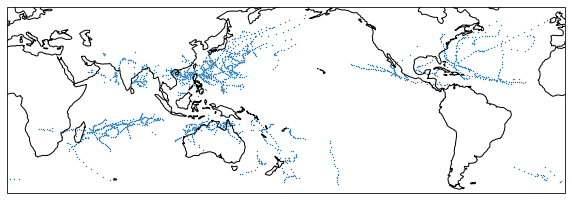

In [4]:
# Most basic visualisation of the dataset
huracanpy.plot.plot_tracks_basic(tracks)

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

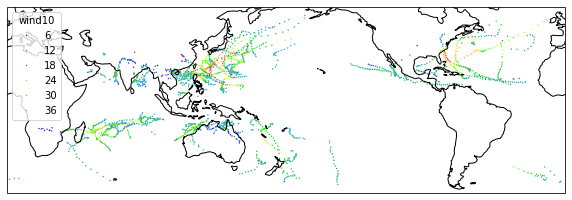

In [5]:
# Adding intensity coloring with `intensity_var`
huracanpy.plot.plot_tracks_basic(tracks, intensity_var="wind10")

/Users/bourdin/Softs/huracanpy/huracanpy/plot/tracks.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/Users/bourdin/Softs/miniconda3/envs/spyder-env/lib/python3.11/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

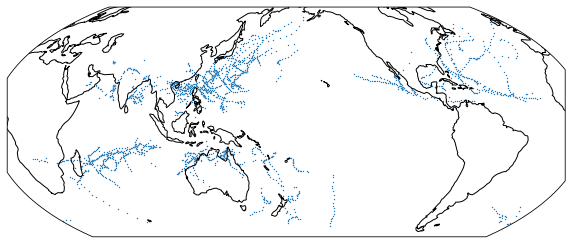

In [19]:
# Changing projection (ex: Mollweide, will work with any Cartopy projection)
import cartopy.crs as ccrs
huracanpy.plot.plot_tracks_basic(tracks, subplot_kws=dict(projection=ccrs.Mollweide(180)))

/Users/bourdin/Softs/huracanpy/huracanpy/plot/tracks.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/Users/bourdin/Softs/miniconda3/envs/spyder-env/lib/python3.11/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


(<Figure size 360x360 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

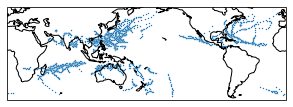

In [20]:
# Changing plot size
huracanpy.plot.plot_tracks_basic(tracks, fig_kws=dict(figsize=(5,5)))

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

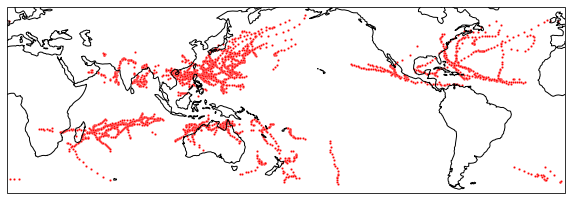

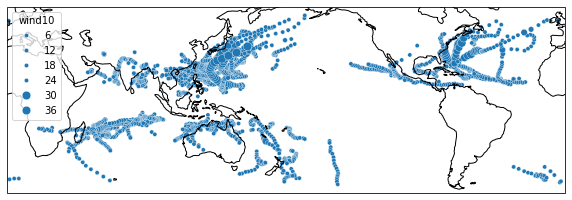

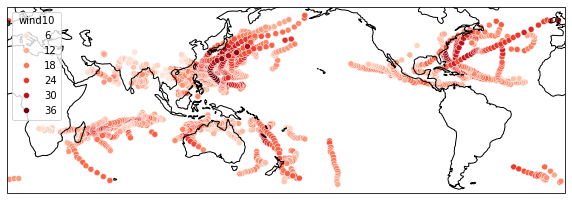

In [37]:
# Use `scatter_kws` to customize the plot (using option from seaborn scatterplot)
huracanpy.plot.plot_tracks_basic(tracks, scatter_kws=dict(s = 5, color = 'r')) # Have large red points
huracanpy.plot.plot_tracks_basic(tracks, scatter_kws=dict(size = "wind10", size_norm = (25,30))) # Size per wind
huracanpy.plot.plot_tracks_basic(tracks, intensity_var = "wind10", scatter_kws=dict(palette = "Reds")) # Change palette

(<Figure size 432x288 with 2 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

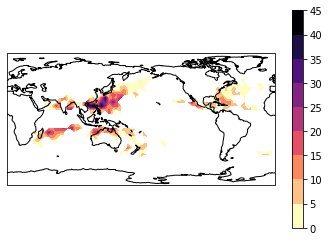

In [7]:
d = huracanpy.diags.track_density.simple_global_histogram(tracks.lon, tracks.lat)
huracanpy.plot.density.plot_density(d)

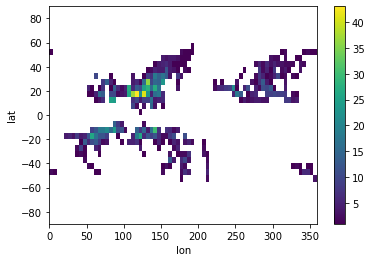

In [9]:
d.plot()

In [12]:
tracks["basin"] = huracanpy.utils.geography.get_basin(tracks.lon, tracks.lat)

In [13]:
tracks.basin

<xarray.DataArray 'basin' (record: 2274)> Size: 18kB
array(['AUS', 'AUS', 'AUS', ..., 'SP', 'SP', 'AUS'], dtype=object)
Coordinates:
  * record   (record) int64 18kB 0 1 2 3 4 5 6 ... 2268 2269 2270 2271 2272 2273

In [15]:
tracks.where(tracks.basin == "AUS", drop = True)

<xarray.Dataset> Size: 33kB
Dimensions:   (record: 278)
Coordinates:
  * record    (record) int64 2kB 0 1 2 3 4 5 6 ... 2243 2244 2245 2246 2247 2273
Data variables: (12/14)
    track_id  (record) float64 2kB 1.207e+03 1.207e+03 ... 1.294e+03 1.295e+03
    year      (record) float64 2kB 1.996e+03 1.996e+03 ... 1.996e+03 1.996e+03
    month     (record) float64 2kB 1.0 1.0 1.0 1.0 1.0 ... 12.0 12.0 12.0 12.0
    day       (record) float64 2kB 3.0 3.0 3.0 3.0 4.0 ... 25.0 25.0 25.0 31.0
    hour      (record) float64 2kB 0.0 6.0 12.0 18.0 0.0 ... 0.0 6.0 12.0 18.0
    i         (record) float64 2kB 549.0 550.0 550.0 553.0 ... 632.0 637.0 540.0
    ...        ...
    lat       (record) float64 2kB -15.5 -15.25 -14.75 ... -11.0 -10.5 -12.5
    slp       (record) float64 2kB 1.006e+05 1.002e+05 ... 9.961e+04 1.005e+05
    zs        (record) float64 2kB 52.12 13.98 32.58 ... -43.85 -34.17 44.54
    wind10    (record) float64 2kB 9.561 11.16 11.03 12.15 ... 16.46 16.05 11.58
    time      (record) datetime64[ns] 2kB 1996-01-03 ... 1996-12-31T18:00:00
    basin     (record) object 2kB 'AUS' 'AUS' 'AUS' 'AUS' ... 'AUS' 'AUS' 'AUS'